In [32]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

#read in the data
df = pd.read_csv(r"C:\Users\admin\Downloads\movies.csv")

In [3]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, (pct_missing)))
#     print(f"{col}-{pct_missing}%")

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [13]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [64]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce', downcast='integer')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce', downcast='integer')

In [77]:
df = df.sort_index(axis=1)
df.head()

budget  company  country  director  genre      gross  name  rating  \
0  19000000     2319       54      2589      6   46998772  6587       6   
1   4500000      731       55      2269      1   58853106  5573       6   
2  18000000     1540       55      1111      0  538375067  5142       4   
3   3500000     1812       55      1301      4   83453539   286       4   
4   6000000     1777       55      1054      4   39846344  1027       6   

   released  runtime  score  star      votes  writer  year year_correct  
0      1705    146.0    8.4  1047   927000.0    4014  1980         1705  
1      1492    104.0    5.8   327    65000.0    1632  1980         1492  
2      1771    124.0    8.7  1745  1200000.0    2567  1980         1771  
3      1492     88.0    7.7  2246   221000.0    2000  1980         1492  
4      1543     98.0    7.3   410   108000.0     521  1980         1543

In [76]:
df['year_correct'] = df['released'].astype(str).str[:4]
df.head()

budget  company  country  director  genre      gross  name  rating  \
0  19000000     2319       54      2589      6   46998772  6587       6   
1   4500000      731       55      2269      1   58853106  5573       6   
2  18000000     1540       55      1111      0  538375067  5142       4   
3   3500000     1812       55      1301      4   83453539   286       4   
4   6000000     1777       55      1054      4   39846344  1027       6   

   released  runtime  score  star      votes  writer  year year_correct  
0      1705    146.0    8.4  1047   927000.0    4014  1980         1705  
1      1492    104.0    5.8   327    65000.0    1632  1980         1492  
2      1771    124.0    8.7  1745  1200000.0    2567  1980         1771  
3      1492     88.0    7.7  2246   221000.0    2000  1980         1492  
4      1543     98.0    7.3   410   108000.0     521  1980         1543

In [79]:
df.sort_values(by = ['gross'], inplace = False, ascending = False)
df.head()

budget  company  country  director  genre      gross  name  rating  \
0  19000000     2319       54      2589      6   46998772  6587       6   
1   4500000      731       55      2269      1   58853106  5573       6   
2  18000000     1540       55      1111      0  538375067  5142       4   
3   3500000     1812       55      1301      4   83453539   286       4   
4   6000000     1777       55      1054      4   39846344  1027       6   

   released  runtime  score  star      votes  writer  year year_correct  
0      1705    146.0    8.4  1047   927000.0    4014  1980         1705  
1      1492    104.0    5.8   327    65000.0    1632  1980         1492  
2      1771    124.0    8.7  1745  1200000.0    2567  1980         1771  
3      1492     88.0    7.7  2246   221000.0    2000  1980         1492  
4      1543     98.0    7.3   410   108000.0     521  1980         1543

In [50]:
pd.set_option('display.max_rows', None)

In [51]:
#Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [52]:
df['company'].drop_duplicates()

0                                            Warner Bros.
1                                       Columbia Pictures
2                                               Lucasfilm
3                                      Paramount Pictures
4                                          Orion Pictures
6                                      Universal Pictures
7                            Chartoff-Winkler Productions
8                                          Dovemead Films
9                                          United Artists
10                                    The Malpaso Company
11                                           C.A.T. Films
14                                      Filmways Pictures
15                                        Rastar Pictures
16                              Metro-Goldwyn-Mayer (MGM)
17                                              IPC Films
18                                  AVCO Embassy Pictures
20                             Lorimar Film Entertainment
21            

In [53]:
# Budget high correlation
# company high correlation

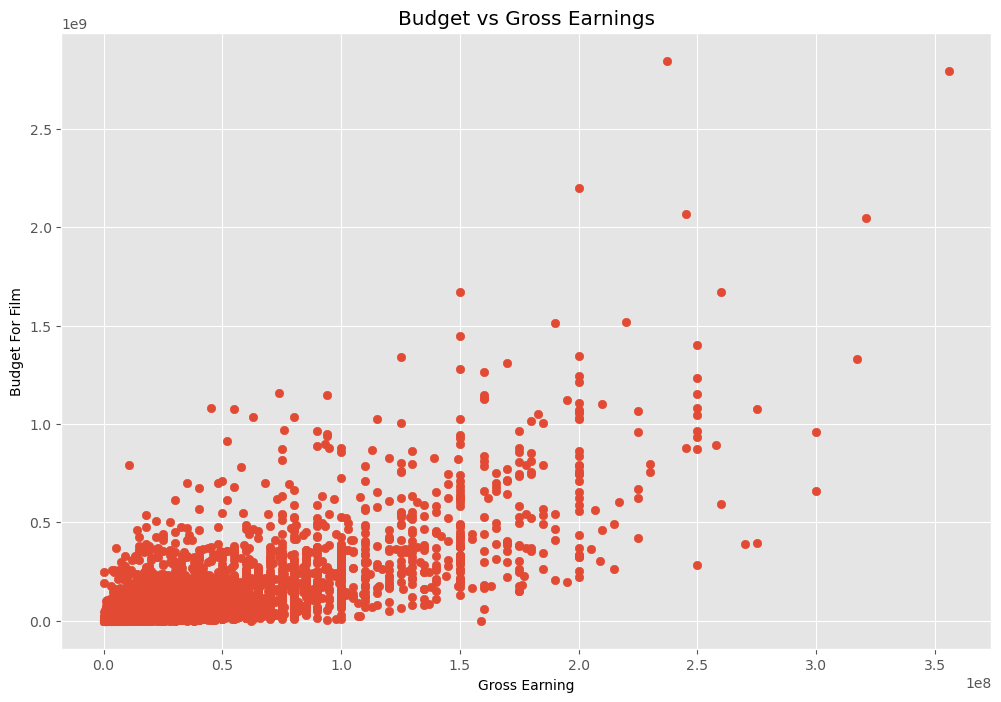

In [54]:
#Scatter plot with budget vs gross
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel("Gross Earning")
plt.ylabel("Budget For Film")
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

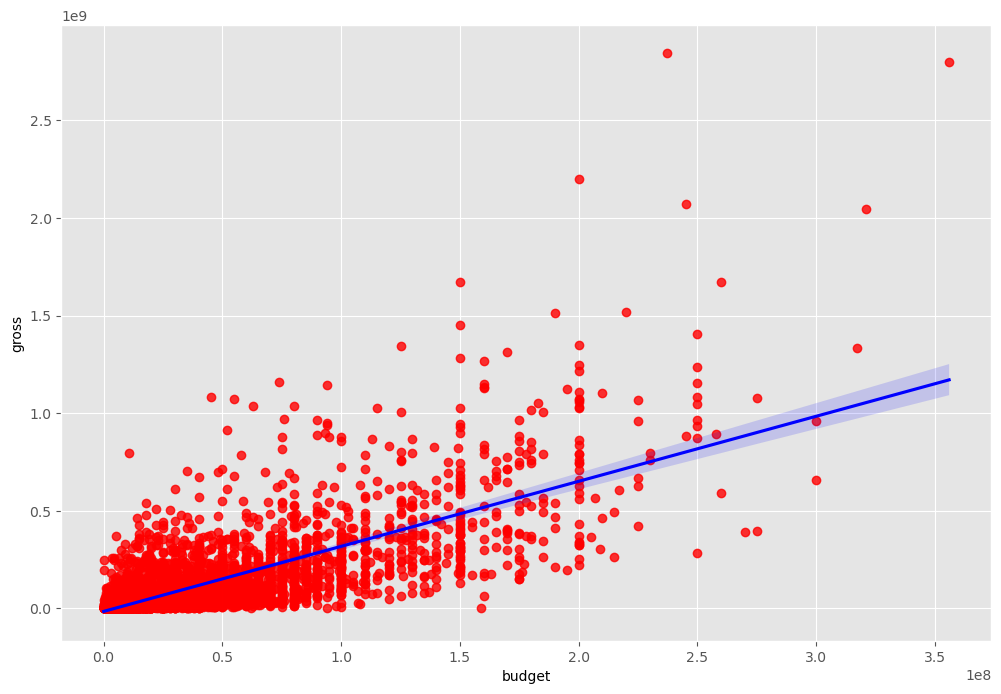

In [56]:
# plot the budget vs gross using seaborn
sns.regplot(x='budget', y ='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [57]:
# Let's start Looking at correlation

In [58]:
df.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_4216\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


budget     gross   runtime     score     votes      year
budget   1.000000  0.740395  0.320447  0.076254  0.442429  0.329321
gross    0.740395  1.000000  0.245216  0.186258  0.630757  0.257486
runtime  0.320447  0.245216  1.000000  0.399451  0.309212  0.120811
score    0.076254  0.186258  0.399451  1.000000  0.409182  0.097995
votes    0.442429  0.630757  0.309212  0.409182  1.000000  0.222945
year     0.329321  0.257486  0.120811  0.097995  0.222945  1.000000

In [59]:
df.corr(method='pearson')

C:\Users\admin\AppData\Local\Temp\ipykernel_4216\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


budget     gross   runtime     score     votes      year
budget   1.000000  0.740395  0.320447  0.076254  0.442429  0.329321
gross    0.740395  1.000000  0.245216  0.186258  0.630757  0.257486
runtime  0.320447  0.245216  1.000000  0.399451  0.309212  0.120811
score    0.076254  0.186258  0.399451  1.000000  0.409182  0.097995
votes    0.442429  0.630757  0.309212  0.409182  1.000000  0.222945
year     0.329321  0.257486  0.120811  0.097995  0.222945  1.000000

In [60]:
df.corr(method='kendall')

C:\Users\admin\AppData\Local\Temp\ipykernel_4216\1723791258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='kendall')


budget     gross   runtime     score     votes      year
budget   1.000000  0.512637  0.235483 -0.000566  0.353702  0.224120
gross    0.512637  1.000000  0.168933  0.086046  0.548899  0.200618
runtime  0.235483  0.168933  1.000000  0.283611  0.198240  0.097184
score   -0.000566  0.086046  0.283611  1.000000  0.300115  0.067652
votes    0.353702  0.548899  0.198240  0.300115  1.000000  0.331465
year     0.224120  0.200618  0.097184  0.067652  0.331465  1.000000

In [61]:
# correlation b/w budget and gross is high

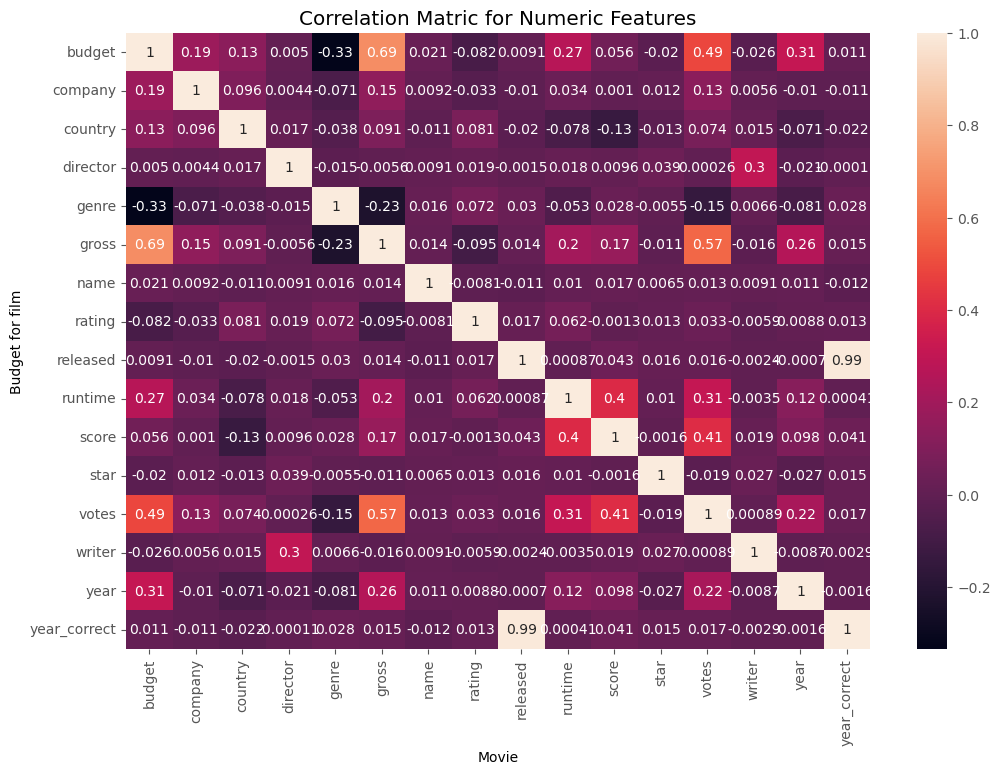

In [69]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie')

plt.ylabel('Budget for film')
plt.show()

In [65]:
#Looks at company
df.head()

budget             company         country         director      genre  \
0  19000000        Warner Bros.  United Kingdom  Stanley Kubrick      Drama   
1   4500000   Columbia Pictures   United States   Randal Kleiser  Adventure   
2  18000000           Lucasfilm   United States   Irvin Kershner     Action   
3   3500000  Paramount Pictures   United States     Jim Abrahams     Comedy   
4   6000000      Orion Pictures   United States     Harold Ramis     Comedy   

       gross                                            name rating  \
0   46998772                                     The Shining      R   
1   58853106                                 The Blue Lagoon      R   
2  538375067  Star Wars: Episode V - The Empire Strikes Back     PG   
3   83453539                                       Airplane!     PG   
4   39846344                                      Caddyshack      R   

                        released  runtime  score            star      votes  \
0  June 13, 1980 (United States)    146.0    8.4  Jack Nicholson   927000.0   
1   July 2, 1980 (United States)    104.0    5.8  Brooke Shields    65000.0   
2  June 20, 1980 (United States)    124.0    8.7     Mark Hamill  1200000.0   
3   July 2, 1980 (United States)     88.0    7.7     Robert Hays   221000.0   
4  July 25, 1980 (United States)     98.0    7.3     Chevy Chase   108000.0   

                    writer  year year_correct  
0             Stephen King  1980         June  
1  Henry De Vere Stacpoole  1980         July  
2           Leigh Brackett  1980         June  
3             Jim Abrahams  1980         July  
4       Brian Doyle-Murray  1980         July

In [66]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

budget  company  country  director  genre       gross  name  rating  \
0      19000000     2319       54      2589      6    46998772  6587       6   
1       4500000      731       55      2269      1    58853106  5573       6   
2      18000000     1540       55      1111      0   538375067  5142       4   
3       3500000     1812       55      1301      4    83453539   286       4   
4       6000000     1777       55      1054      4    39846344  1027       6   
5        550000     1812       55      2528     10    39754601  2109       6   
6      27000000     2281       55      1412      0   115229890  5574       6   
7      18000000      631       55      1829      3    23402427  4436       6   
8      54000000      883       55      2306      0   108185706  5281       4   
9      10000000     2272       55      2864      3    15795189  6213       6   
10     15000000     2190       55       357      0    70687344   463       4   
11      5000000      522       44      1199      1    30031783  5920       4   
12     20000000     1812       55      2352      1    49823037  4315       4   
13      6000000     1812       55      2388      6    54766923  4084       6   
14      6500000     1074       55       318      5    31899000  1687       6   
15      5100000     1935       55      1243      6     9709597  5024       4   
16            0     1637       55        49      6    21202829  1900       6   
17     10000000     1304       55       514      4   103300686    92       4   
18      1000000       74       55      1374     10    21448782  5865       6   
19            0      731       55      2561      4   101300000  5189       6   
20     11000000     1532       57      2891      5    19814523  1387       6   
21     44000000     1819       55      1892      1     3484523  2451       6   
22     12000000      500       55       744      0    16647800  5845       4   
23     20000000     2281       55      2371      8    22762571  7445       4   
24            0     1812       55      1153      6    46918287  7127       4   
25            0     2319       55      1583     10    19853892   346       6   
26            0     2126       55      2433      4    34326249  3263       6   
27     36000000     1306       54      1282      0           0  4442       4   
28      9000000     2253       55      2673      5    37121708   980       6   
29      4800000     1812       55      2151      5    22743674   362       6   
30            0     2253       55      2811      4    22482952  3796       4   
31            0     1216        6      2143     10    14796236  4373       6   
32            0     2281       55      1041      0    66132626  4987       4   
33      5100000      603       55      1644      6      534816  1103       4   
34            0     1934       55      1225      4    43995918  4785       4   
35     10000000     2319       55      1091      4    69847348  4362       6   
36      4000000     1869       55       855      4    10000000  6008       6   
37      3000000      552       55      1598      4     6342668  3721       6   
38            0      899       55      2296      6    27118000  6102       4   
39            0     2281       55      1884      3    67182787  1244       4   
40            0     2317       55      1403      7     5000000  6748       4   
41            0     2202        2       335      6           0   927       4   
42      3500000     1628       55      2314      0     7063886  6644       6   
43            0     2281       55       186      3     6659377  7305       6   
44            0      899       54      1978     10     8415112  5504       6   
45            0     2281       55      2804      4    41675194  1152       6   
46     22000000     2281       55      1934      0    15716828  6094       6   
47       300000     2184       55      2836     10           0  5578       6   
48     15000000     2281       55       509      0    14662035  6360       4   
49     35

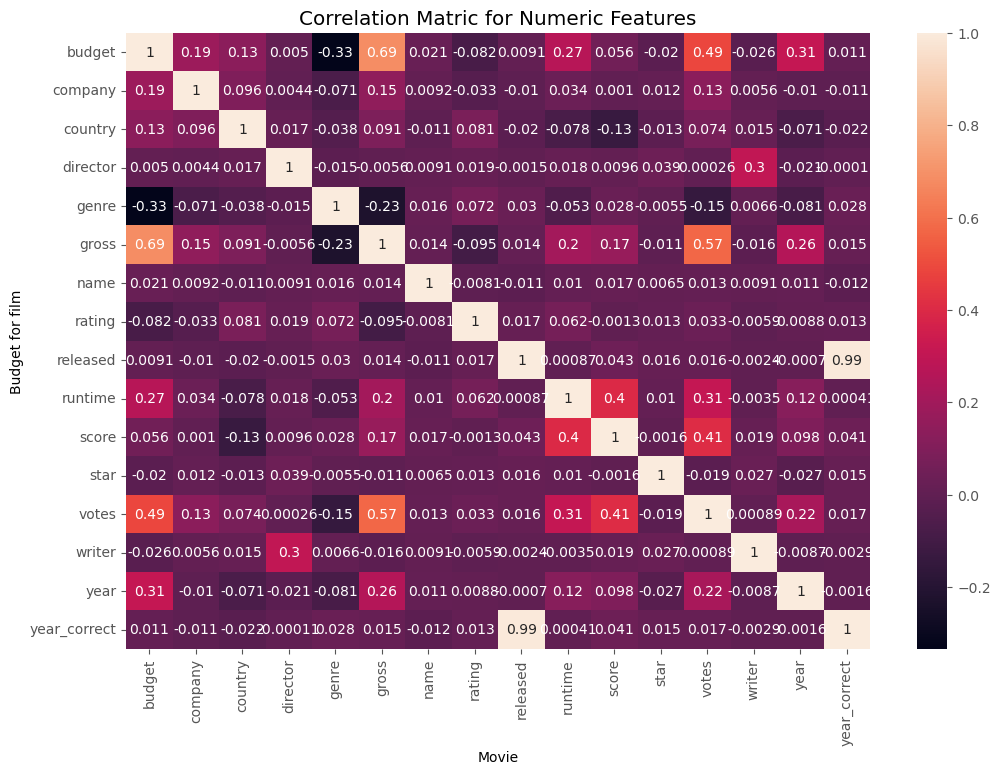

In [68]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie')

plt.ylabel('Budget for film')
plt.show()

In [72]:
df_numerized.corr()

budget   company   country  director     genre     gross  \
budget        1.000000  0.186474  0.131720  0.004976 -0.334021  0.687124   
company       0.186474  1.000000  0.095548  0.004404 -0.071067  0.148722   
country       0.131720  0.095548  1.000000  0.017490 -0.037615  0.091404   
director      0.004976  0.004404  0.017490  1.000000 -0.015258 -0.005615   
genre        -0.334021 -0.071067 -0.037615 -0.015258  1.000000 -0.229534   
gross         0.687124  0.148722  0.091404 -0.005615 -0.229534  1.000000   
name          0.020548  0.009211 -0.010737  0.009079  0.016355  0.013895   
rating       -0.081939 -0.032943  0.081244  0.019483  0.072423 -0.095355   
released      0.009145 -0.010474 -0.020427 -0.001478  0.029822  0.014154   
runtime       0.269510  0.034402 -0.078412  0.017624 -0.052711  0.204177   
score         0.055665  0.001030 -0.133348  0.009559  0.027965  0.169406   
star         -0.019952  0.012442 -0.012998  0.039234 -0.005477 -0.010628   
votes         0.486862  0.133204  0.073625  0.000260 -0.145307  0.573889   
writer       -0.025911  0.005646  0.015343  0.299067  0.006567 -0.015602   
year          0.309212 -0.010431 -0.070938 -0.020795 -0.081261  0.256331   
year_correct  0.010544 -0.010726 -0.022277 -0.000105  0.028397  0.015338   

                  name    rating  released   runtime     score      star  \
budget        0.020548 -0.081939  0.009145  0.269510  0.055665 -0.019952   
company       0.009211 -0.032943 -0.010474  0.034402  0.001030  0.012442   
country      -0.010737  0.081244 -0.020427 -0.078412 -0.133348 -0.012998   
director      0.009079  0.019483 -0.001478  0.017624  0.009559  0.039234   
genre         0.016355  0.072423  0.029822 -0.052711  0.027965 -0.005477   
gross         0.013895 -0.095355  0.014154  0.204177  0.169406 -0.010628   
name          1.000000 -0.008069 -0.011311  0.010392  0.017097  0.006472   
rating       -0.008069  1.000000  0.016613  0.062145 -0.001314  0.013405   
released     -0.011311  0.016613  1.000000  0.000868  0.042788  0.015777   
runtime       0.010392  0.062145  0.000868  1.000000  0.399451  0.010174   
score         0.017097 -0.001314  0.042788  0.399451  1.000000 -0.001609   
star          0.006472  0.013405  0.015777  0.010174 -0.001609  1.000000   
votes         0.013088  0.033225  0.016097  0.309212  0.409182 -0.019282   
writer        0.009081 -0.005921 -0.002404 -0.003511  0.019416  0.027245   
year          0.011453  0.008779 -0.000695  0.120811  0.097995 -0.027242   
year_correct -0.011725  0.013475  0.993694  0.000410  0.040993  0.015406   

                 votes    writer      year  year_correct  
budget        0.486862 -0.025911  0.309212      0.010544  
company       0.133204  0.005646 -0.010431     -0.010726  
country       0.073625  0.015343 -0.070938     -0.022277  
director      0.000260  0.299067 -0.020795     -0.000105  
genre        -0.145307  0.006567 -0.081261      0.028397  
gross         0.573889 -0.015602  0.256331      0.015338  
name          0.013088  0.009081  0.011453     -0.011725  
rating        0.033225 -0.005921  0.008779      0.013475  
released      0.016097 -0.002404 -0.000695      0.993694  
runtime       0.309212 -0.003511  0.120811      0.000410  
score         0.409182  0.019416  0.097995      0.040993  
star         -0.019282  0.027245 -0.027242      0.015406  
votes         1.000000  0.000892  0.222945      0.017337  
writer        0.000892  1.000000 -0.008656     -0.002892  
year          0.222945 -0.008656  1.000000     -0.001562  
year_correct  0.017337 -0.002892 -0.001562      1.000000

In [73]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget        budget          1.000000
              company         0.186474
              country         0.131720
              director        0.004976
              genre          -0.334021
              gross           0.687124
              name            0.020548
              rating         -0.081939
              released        0.009145
              runtime         0.269510
              score           0.055665
              star           -0.019952
              votes           0.486862
              writer         -0.025911
              year            0.309212
              year_correct    0.010544
company       budget          0.186474
              company         1.000000
              country         0.095548
              director        0.004404
              genre          -0.071067
              gross           0.148722
              name            0.009211
              rating         -0.032943
              released       -0.010474
              runtime    

In [74]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.334021
budget        genre          -0.334021
gross         genre          -0.229534
genre         gross          -0.229534
              votes          -0.145307
votes         genre          -0.145307
country       score          -0.133348
score         country        -0.133348
gross         rating         -0.095355
rating        gross          -0.095355
budget        rating         -0.081939
rating        budget         -0.081939
genre         year           -0.081261
year          genre          -0.081261
country       runtime        -0.078412
runtime       country        -0.078412
company       genre          -0.071067
genre         company        -0.071067
country       year           -0.070938
year          country        -0.070938
genre         runtime        -0.052711
runtime       genre          -0.052711
country       genre          -0.037615
genre         country        -0.037615
rating        company        -0.032943
company       rating     

In [75]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross         votes           0.573889
votes         gross           0.573889
budget        gross           0.687124
gross         budget          0.687124
year_correct  released        0.993694
released      year_correct    0.993694
budget        budget          1.000000
writer        writer          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
rating        rating          1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company         1.000000
year          year            1.000000
year_correct  year_correct    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correaltion to the gross earning

# Company has low correlation